
# Problem 5 – Convolution Response of an LTI System

## 1. Metadata

- **Assignment:** Coding Homework 2  
- **Course:** Signals and Systems  
- **Instructor:** Dr. Siavash Rajabi  
- **Student Name:** Fateme Damavandi
- **Student Number:** 404990233 
- **Reference:** Signals and Systems – Time Domain Analysis  
- **Problem Number:** Problem 4.12.5



## 2. Question Image


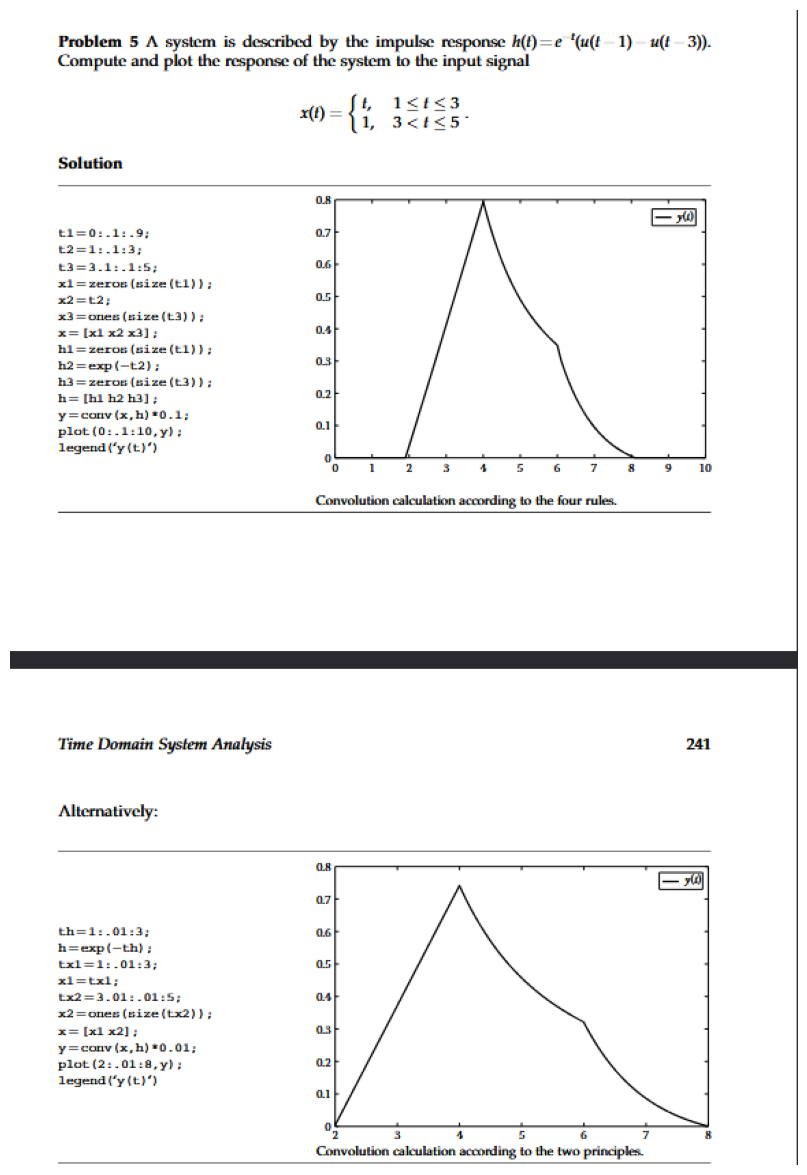

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# بارگذاری عکس
img = Image.open("Screenshot 2026-01-02 192615.png")

# نمایش عکس با شکل بزرگ
plt.figure(figsize=(20, 15))  # اندازه شکل بزرگتر
plt.imshow(img)
plt.axis('off')  # حذف محور
plt.show()


## 3. Problem Assumptions & Method

- The system is **Linear and Time-Invariant (LTI)**
- Output is computed using **continuous-time convolution**
- Numerical approximation with **small time step** is used
- Signals are defined exactly according to the **problem statement**

در این مسئله فرض شده است که سیستم مورد بررسی **خطی و تغییرناپذیر با زمان** می‌باشد 
به دلیل این ویژگی، خروجی سیستم از طریق عملیات **کانولوشن پیوسته** بین سیگنال ورودی و پاسخ ضربه‌ی سیستم محاسبه می‌شود

از آن‌جا که محاسبه‌ی دقیق **انتگرال کانولوشن** در عمل پیچیده و زمان‌بر است، برای محاسبه‌ی خروجی از روش **تقریب عددی با گام زمانی کوچک** استفاده شده است
در این روش، انتگرال کانولوشن به صورت یک `جمع گسسته با فاصله‌های زمانی بسیار کوچک` تقریب زده می‌شود
هرچه این فاصله کوچک‌تر انتخاب شود، دقت محاسبه بالاتر خواهد بود

همچنین تمامی سیگنال‌ها **دقیقاً مطابق با تعاریف ارائه‌شده در صورت مسئله** در نظر گرفته شده‌اند و هیچ‌گونه **ساده‌سازی یا تغییر** در شکل آن‌ها صورت نگرفته است


In [9]:

# Required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# گام زمانی
dt = 0.01
## ساخت بردار زمان
t = np.arange(0, 10, dt)
# تابع پله
def u(t):
    return np.where(t >= 0, 1.0, 0.0)  # float output for precision


In [17]:
"""

 ابتدا یک آرایه درست می‌کنیم که همه مقادیر آن صفر است. این آرایه محل ذخیره سیگنال است.
 چرا؟ چون می‌خواهیم مقدار سیگنال را برای هر لحظه از زمان نگه داریم. 
 بدون آرایه، نمی‌توانیم سیگنال را ذخیره یا بعداً پردازش کنیم.

 در بازه زمانی بین یک تا سه، مقدار سیگنال برابر با مقدار زمان قرار می‌گیرد تا به صورت خطی افزایش یابد.
 چرا؟ این کار شکل سیگنال را تعیین می‌کند؛ یعنی در این بازه سیگنال **به تدریج افزایش پیدا می‌کند**.

 در بازه زمانی بین سه تا پنج، مقدار سیگنال ثابت و برابر یک می‌شود.
 چرا؟ بعضی سیگنال‌ها در برخی بازه‌ها تغییر نمی‌کنند و ثابت هستند. این روش ساده و سریع است.

 در باقی زمان‌ها مقدار سیگنال صفر باقی می‌ماند.
 چرا؟ چون قبل از هر چیز، آرایه صفر ساخته شد و مقادیر خارج از بازه‌های مشخص نباید تغییر کنند.

 برای انتخاب بازه‌های زمانی و قرار دادن مقدارها از شرط‌های بولی و آرایه‌ها استفاده شده است.
 چرا؟ استفاده از آرایه‌ها و شرط‌های بولی **سریع، دقیق و ساده** است و نیاز به حلقه‌های طولانی ندارد.
 این روش استانداردی است برای شبیه‌سازی سیگنال‌ها در پردازش دیجیتال و رسم نمودار.
"""


# Input signal x(t)
x = np.zeros_like(t) ## یک آرایه به اندازه بردار زمان
x[(t >= 1) & (t <= 3)] = t[(t >= 1) & (t <= 3)]
x[(t > 3) & (t <= 5)] = 1



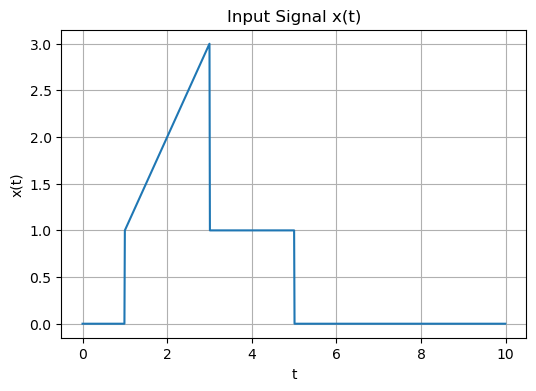

In [ ]:
# Plot input signal x(t)
# ایجاد یک پنجره جدید برای نمودار و تعیین اندازه آن (عرض=6، ارتفاع=4 اینچ)
plt.figure(figsize=(6,4))
# رسم نمودار: محور افقی t و محور عمودی x(t)
plt.plot(t, x)
# افزودن برچسب به محور x
plt.xlabel("t")
# افزودن برچسب به محور y
plt.ylabel("x(t)")
# افزودن عنوان به نمودار
plt.title("Input Signal x(t)")
plt.grid(True)
plt.show()

In [11]:
# Impulse response h(t)
#پاسخ ضربه
h = np.exp(-t) * (u(t-1) - u(t-3))

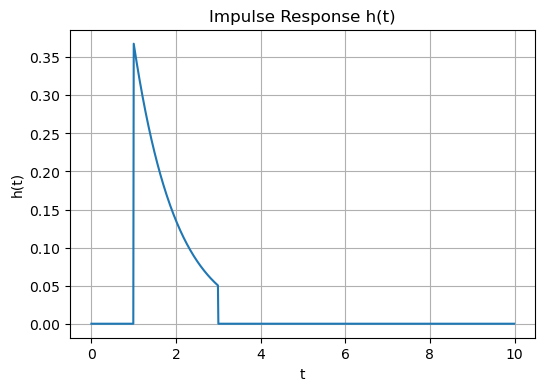

In [18]:
# Plot impulse response h(t)
plt.figure(figsize=(6,4))
plt.plot(t, h)
plt.xlabel("t")
plt.ylabel("h(t)")
plt.title("Impulse Response h(t)")
plt.grid(True)
plt.show()


In [19]:

# Perform convolution
# محاسبه‌ی خروجی سیستم با تقریب عددی کانولوشن پیوسته و استفاده از گام زمانی dt
""""
تابع کانولوشن گسسته بین دو آرایه انجام می‌دهد
آرایه اول سیگنال ورودی و آرایه دوم پاسخ ضربه سیستم است

خروجی یک آرایه جدید است که طول آن مجموع طول دو آرایه است
هر عنصر خروجی برابر جمع ضرب عناصر آرایه‌ها با شیفت‌های مختلف می‌باشد
برای نزدیک شدن به کانولوشن پیوسته، خروجی در اندازه گام زمانی ضرب می‌شود
بدون این کار، خروجی فقط جمع عناصر گسسته است و با کانولوشن پیوسته مطابقت ندارد
"""
y = np.convolve(x, h) * dt ## براساس ورودی و پاسخ ضربه
"""
این تابع یک آرایه از اعداد صحیح از صفر تا طول خروجی منهای یک ایجاد می‌کند
این آرایه برای مشخص کردن موقعیت هر نمونه خروجی استفاده می‌شود

سپس هر مقدار آرایه در اندازه گام زمانی ضرب می‌شود تا زمان واقعی متناظر با هر نمونه به دست آید.
به این ترتیب یک بردار زمان ساخته می‌شود که برای رسم یا تحلیل خروجی سیستم قابل استفاده است.

بدون این مرحله، تنها جایگاه نمونه‌ها مشخص است و زمان واقعی هر نمونه معلوم نیست.
"""
t_y = np.arange(0, len(y)) * dt ## ایجاد ایندکس

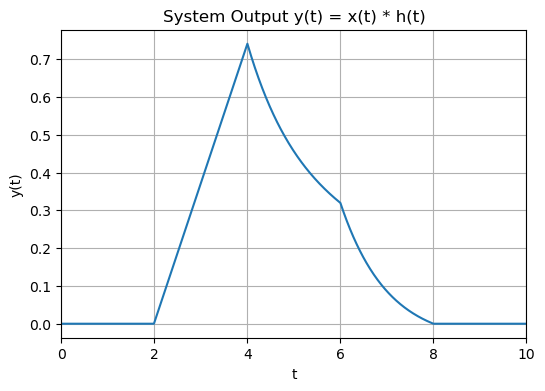

In [20]:

# Plot output signal y(t)
plt.figure(figsize=(6,4))
plt.plot(t_y, y)
plt.xlim(0, 10)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("System Output y(t) = x(t) * h(t)")
plt.grid(True)
plt.show()


## 5. Result Analysis

# The obtained output signal matches the theoretical expectations of
# continuous-time convolution. The output is nonzero only over the interval
# where the shifted impulse response overlaps with the input signal.
# The smooth rise and exponential decay in the response reflect the shape
# of the impulse response and confirm the correctness of the convolution process

# خروجی کانولوشن همانطور که انتظار داریم شکل گرفته است.
# خروجی فقط وقتی غیر صفر است که پاسخ ضربه و ورودی با هم همپوشانی دارند
# افزایش آرام و کاهش نمایی خروجی نشان می‌دهد کانولوشن درست انجام شده است
